# Image Data Augmentation with Numpy

Take a set of images and do data augmentation to create a bigger, more diverse batch of images used for training ML models.

To do: Run notebook and do the 3 exercises


## Download 'elephant drawings' 

In [1]:
### Create output directory
import os

try:
    os.makedirs("augmented")
    print("done")
except FileExistsError:
    print("WARNING: Output directory already exists. Check to make sure it is empty.")

done


## Flip and rotate

Flip the original images:
- flip left right
- flip up down
- flip up down-left right

Rotate all flipped images:
- rotate 45 degrees
- rotate 90 degrees
- rotate 135 degrees

If you start with 10 original images, after flipping you will have 40, after rotating you will have 160 (40 not rotated+120 rotated images).

In [3]:
# create all flipped images
from PIL import Image
import numpy as np
import glob, os

for infile in glob.glob("elephants_drawings/*.jpg"):
    file, ext = os.path.splitext(infile)
    directory, file_name = os.path.split(file)
    with Image.open(infile) as im:
        img_ar = np.asarray(im)
        flipped_lr = np.fliplr(img_ar)
        flipped_ud = np.flipud(img_ar)
        flipped_lr_ud = np.flipud(np.fliplr(img_ar))

        flip_im_lr = Image.fromarray(flipped_lr)
        flip_im_ud = Image.fromarray(flipped_ud)
        flip_im_lr_ud = Image.fromarray(flipped_lr_ud)

        flip_im_lr.save(f"augmented/{file_name}_flipped_lr.jpg")
        flip_im_ud.save(f"augmented/{file_name}_flipped_ud.jpg")
        flip_im_lr_ud.save(f"augmented/{file_name}flipped_lr_ud.jpg")
print("done")

done


### Exercise 1: Inspect the result

How many images have been created? 
Create a script that counts the images, for example with glob.

In [5]:
# YOUR CODE HERE

# Count the number of images in the augmented directory

augmented_dir = "augmented"
num_augmented_images = len([name for name in os.listdir(augmented_dir) if os.path.isfile(os.path.join(augmented_dir, name))])
print(num_augmented_images)

27


### Now rotate the images

In [7]:
from PIL import Image
import numpy as np
import skimage.transform
import skimage.util

for infile in glob.glob("elephants_drawings/*.jpg"):
    file, ext = os.path.splitext(infile)
    directory, file_name = os.path.split(file)
    with Image.open(infile) as im:
        img_ar = np.asarray(im)
        img_rot_45 = skimage.transform.rotate(
            img_ar, angle=45, mode="edge", preserve_range=True
        )
        img_rot_90 = skimage.transform.rotate(
            img_ar, angle=90, mode="edge", preserve_range=True
        )
        img_rot_135 = skimage.transform.rotate(
            img_ar, angle=135, mode="edge", preserve_range=True
        )
        img_rot_45 = img_rot_45.astype(np.uint8)
        img_rot_90 = img_rot_90.astype(np.uint8)
        img_rot_135 = img_rot_135.astype(np.uint8)
        img_rotated_45 = Image.fromarray(img_rot_45)
        img_rotated_90 = Image.fromarray(img_rot_90)
        img_rotated_135 = Image.fromarray(img_rot_135)
        img_rotated_45.save(f"augmented/{file_name}_rot_45.jpg")
        img_rotated_90.save(f"augmented/{file_name}_rot_90.jpg")
        img_rotated_135.save(f"augmented/{file_name}_rot_135.jpg")
print("done")

done


###  Exercise 2: Check number of images
Same as exercise 1

In [8]:
# YOUR CODE HERE

# Count the number of images in the augmented directory
num_augmented_images = len([name for name in os.listdir(augmented_dir) if os.path.isfile(os.path.join(augmented_dir, name))])
print(num_augmented_images)

54


### Exercise 3: Use IPyplot to display many images at once

Check the code yourself: https://github.com/karolzak/ipyplot

IndexError: index 4 is out of bounds for axis 0 with size 4

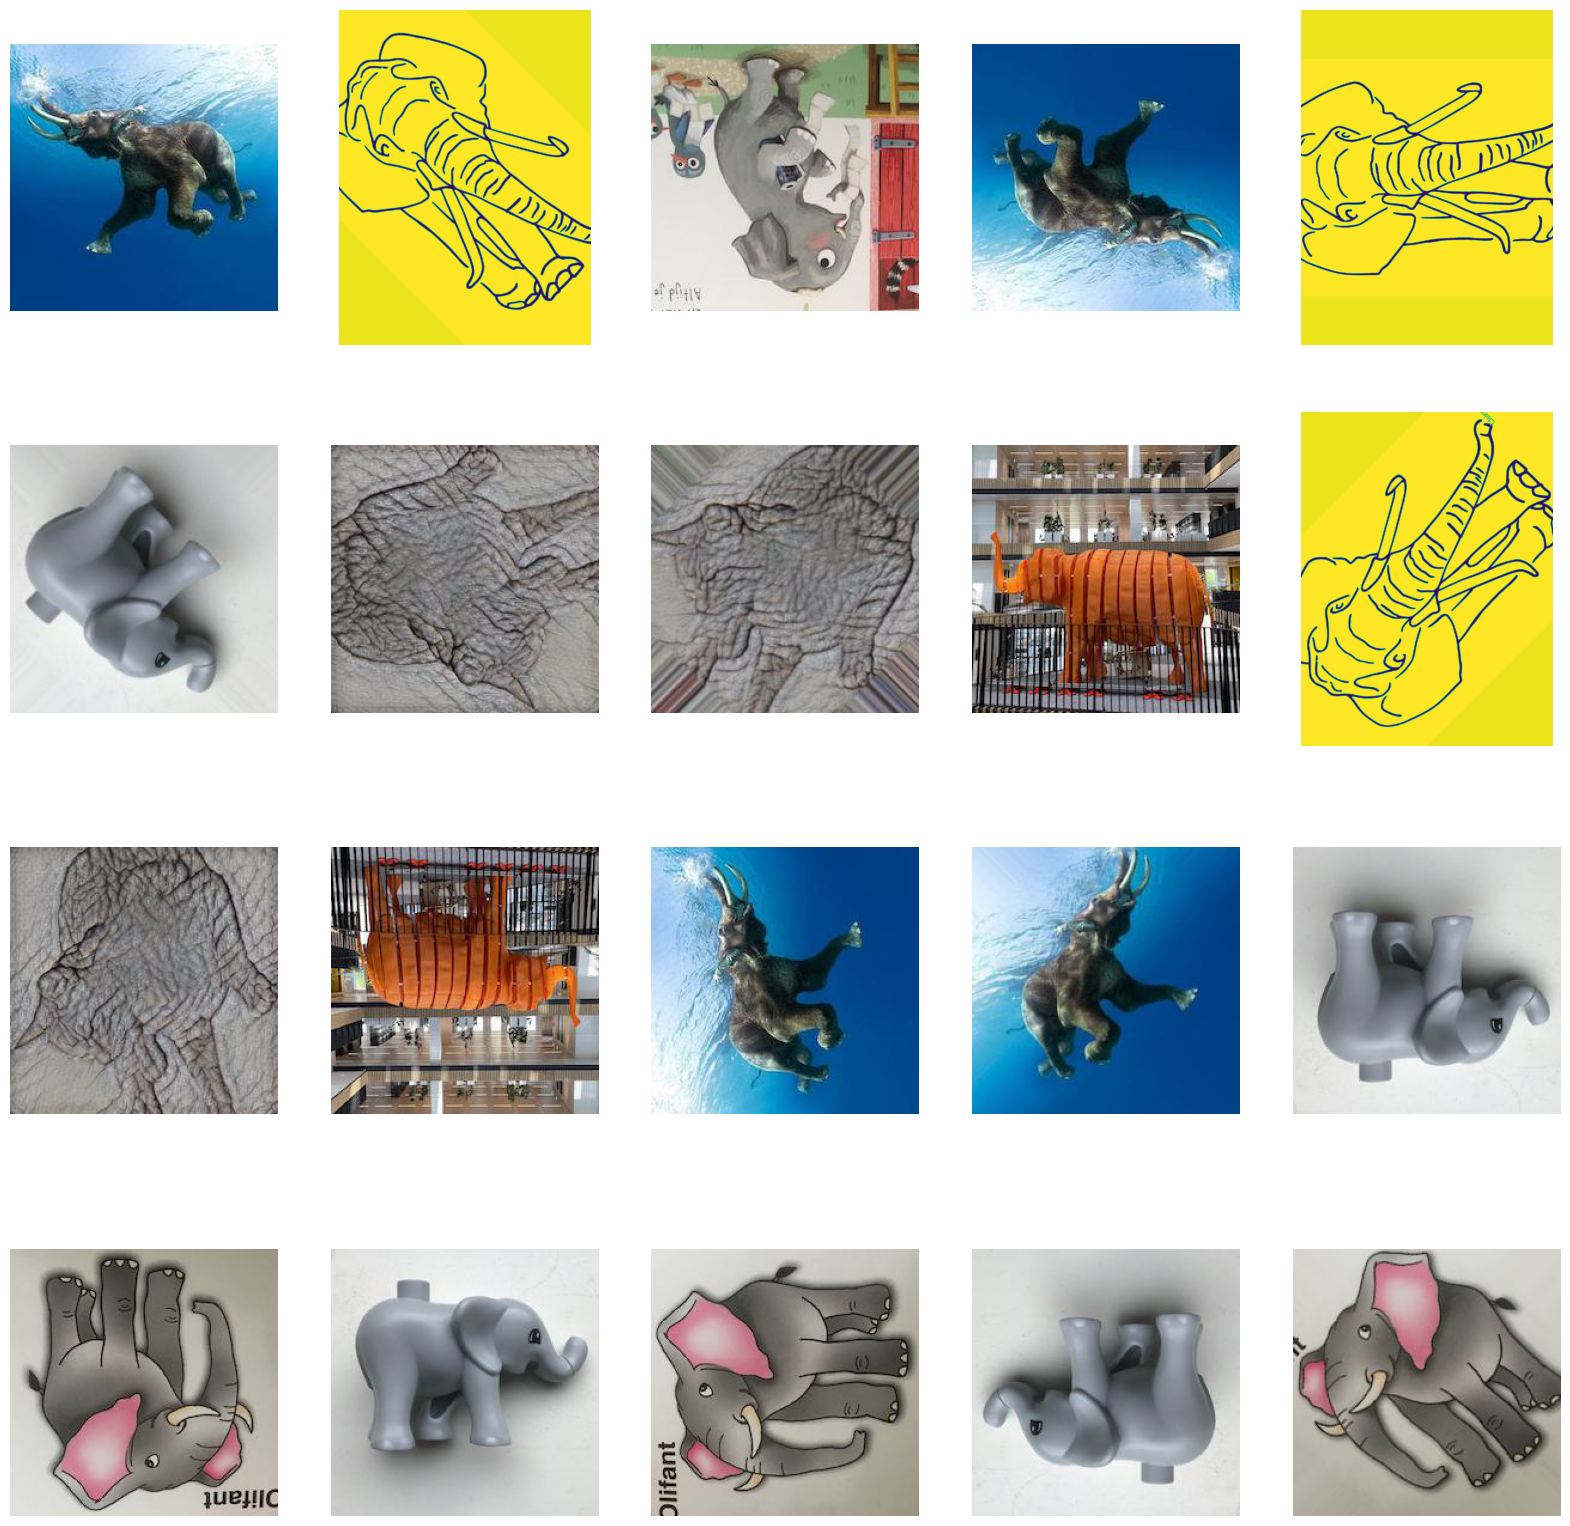

In [12]:
# YOUR CODE HERE

# Plot the first 20 images in the augmented directory
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 5, figsize=(20, 20))
for i, file in enumerate(glob.glob("augmented/*.jpg")):
    with Image.open(file) as im:
        ax = axs[i // 5, i % 5]
        ax.imshow(im)
        ax.axis("off")
        

plt.show()


### Bonus: do the same with Keras
See documentation: https://keras.io/api/layers/preprocessing_layers/image_augmentation/

In [ ]:
# YOUR CODE HERE
